In [6]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import os

# Tell python where field paths etc are relative to
run_dir = os.path.abspath('')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Read in fault model and catalogue.
Bruce's fault files are quite large and can be downloaded from https://github.com/uc-eqgeo/rnc2-data/tree/main/bruce/faults

In [3]:
catalogue = RsqSimCatalogue.from_csv_and_arrays(os.path.join(run_dir, "../../../data/bruce_m7/bruce_m7_10kyr"))
bruce_faults = RsqSimMultiFault.read_fault_file_bruce(os.path.join(run_dir, "../../../data/bruce_m7/bruce_faults.in"),
                                                      os.path.join(run_dir, "../../../data/bruce_m7/bruce_names.in"),
                                                      transform_from_utm=True)

Event of interest (note that we have only selected faults that rupture with >50 patches in this event).

Note also that `events_by_number` returns a list, and we take the first element from it.

In [7]:
m9 = catalogue.events_by_number(588, bruce_faults, min_patches=50)[0]

Create and write animation

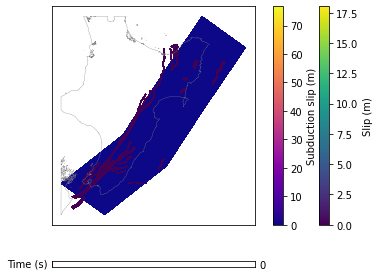

In [8]:
m9.plot_slip_evolution(step_size = 5, write="slip_evolution", show=False)

Display GIF

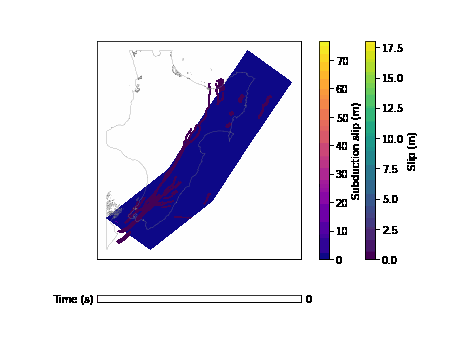

In [9]:
from IPython.display import Image
Image(open('slip_evolution.gif','rb').read())